In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
# Завдання 1
df = pd.read_csv('bikes_rent.csv')
table_string = df.head().to_string(index=False)
print(table_string)

 season  yr  mnth  holiday  weekday  workingday  weathersit      temp    atemp     hum  windspeed(mph)  windspeed(ms)  cnt
      1   0     1        0        6           0           2 14.110847 18.18125 80.5833       10.749882       4.805490  985
      1   0     1        0        0           0           2 14.902598 17.68695 69.6087       16.652113       7.443949  801
      1   0     1        0        1           1           1  8.050924  9.47025 43.7273       16.636703       7.437060 1349
      1   0     1        0        2           1           1  8.200000 10.60610 59.0435       10.739832       4.800998 1562
      1   0     1        0        3           1           1  9.305237 11.46350 43.6957       12.522300       5.597810 1600


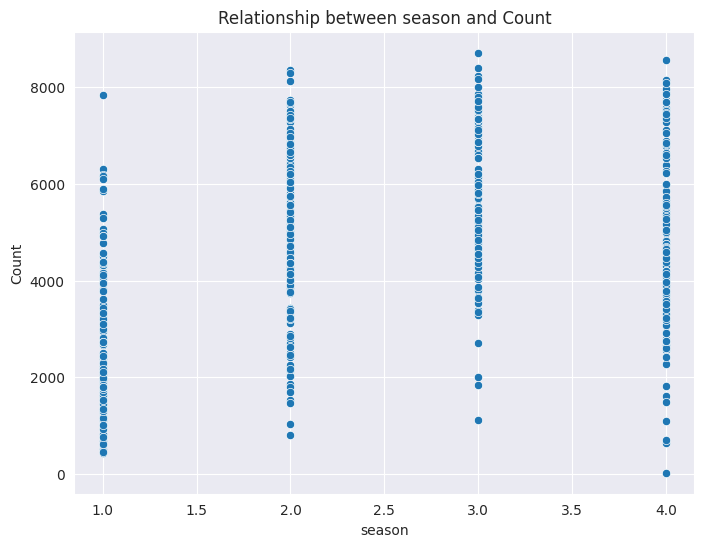

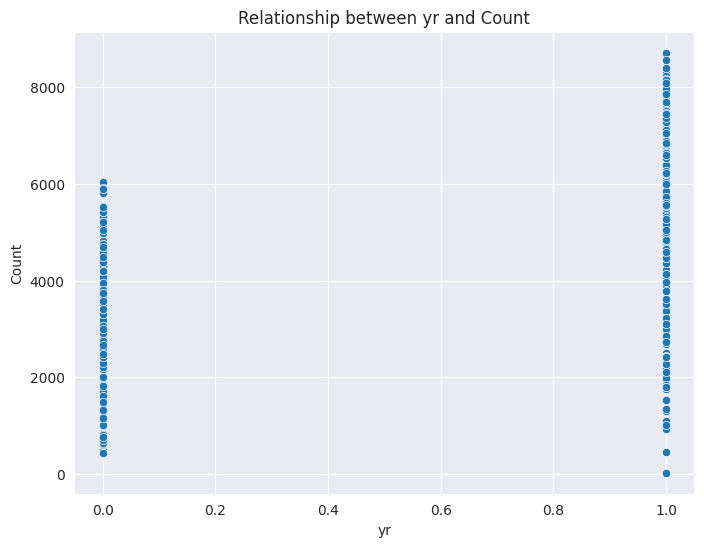

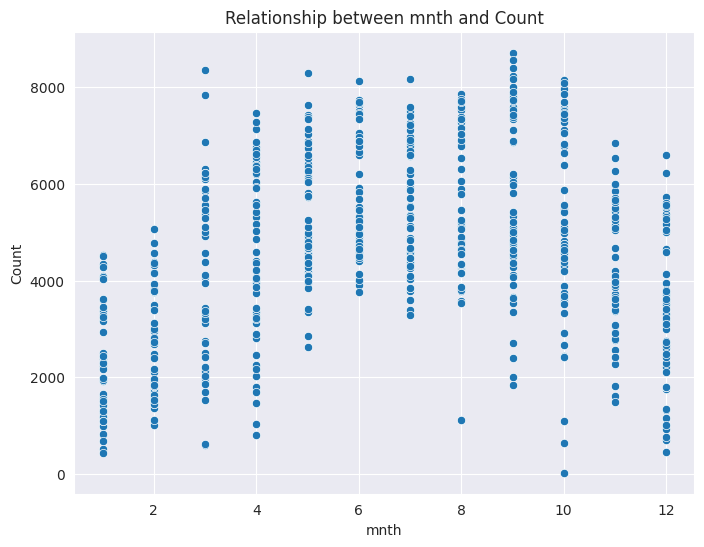

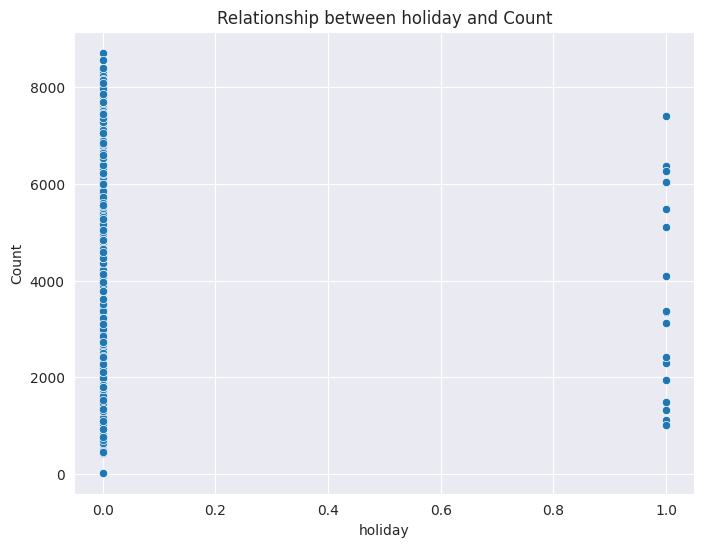

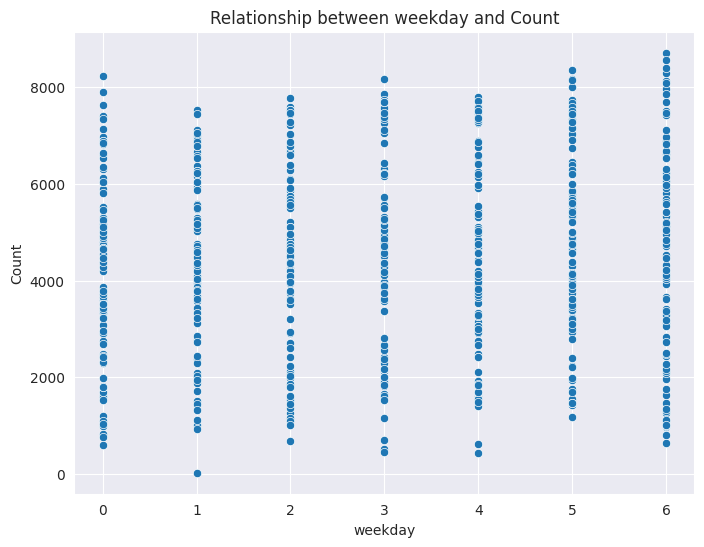

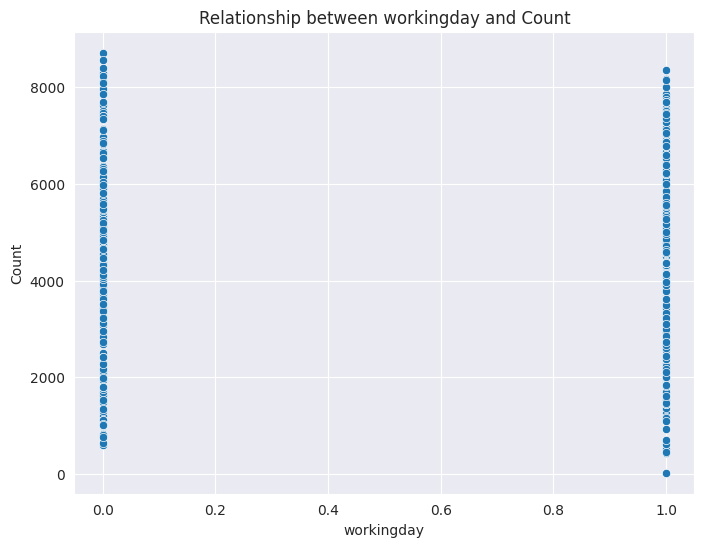

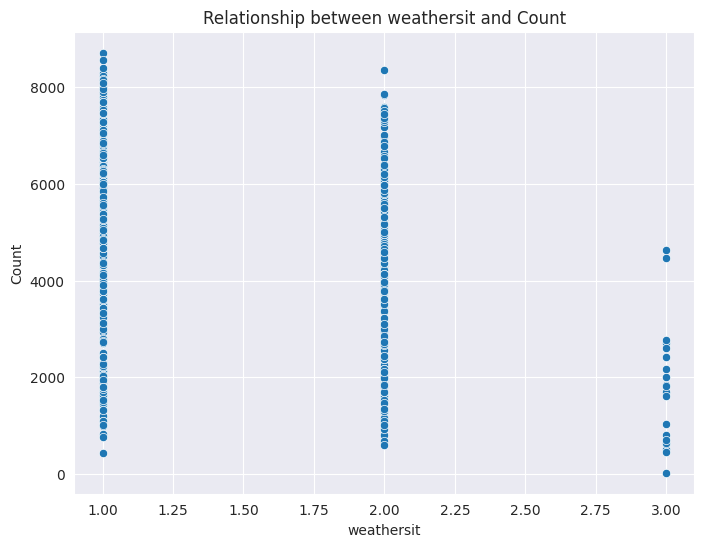

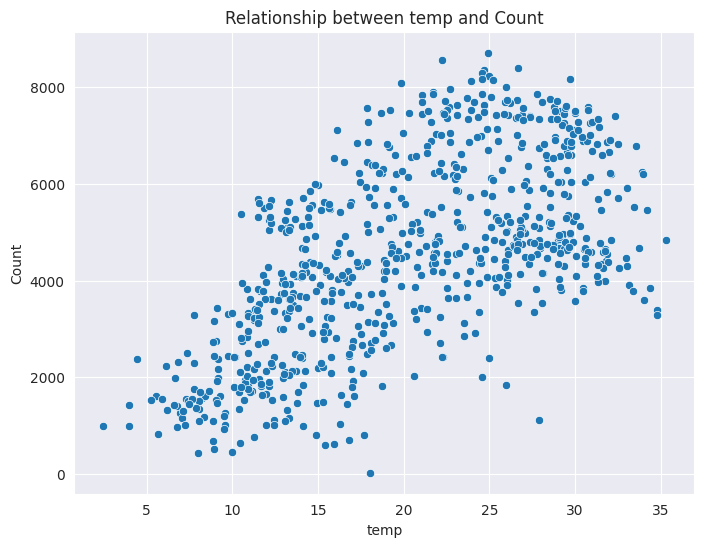

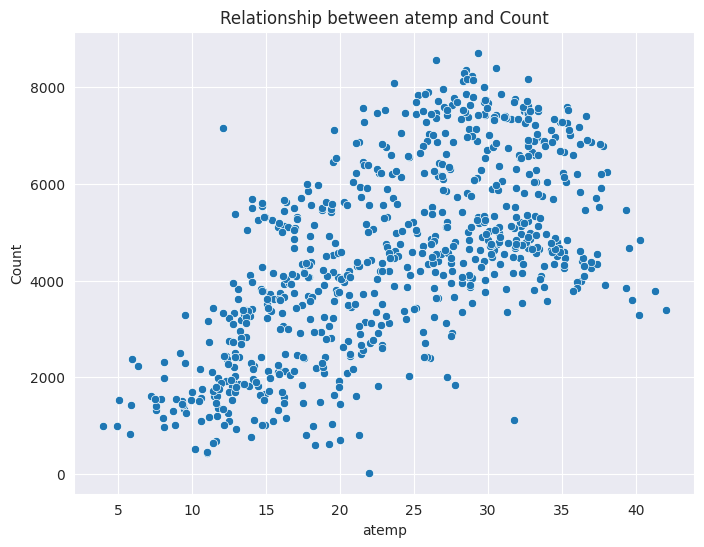

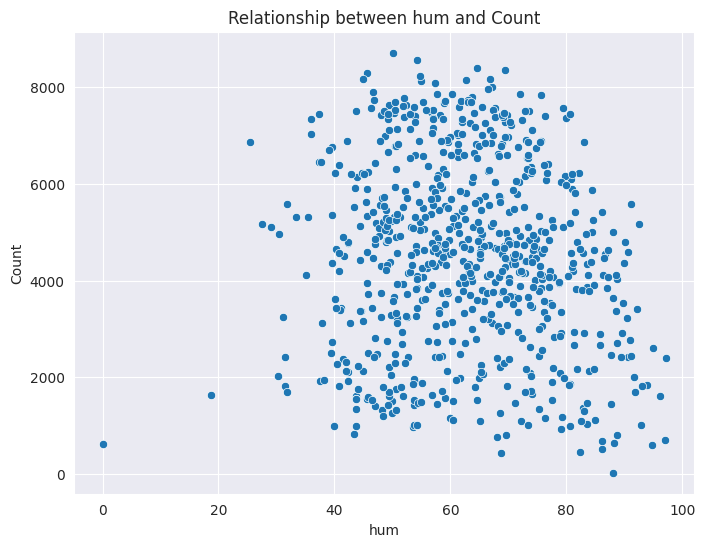

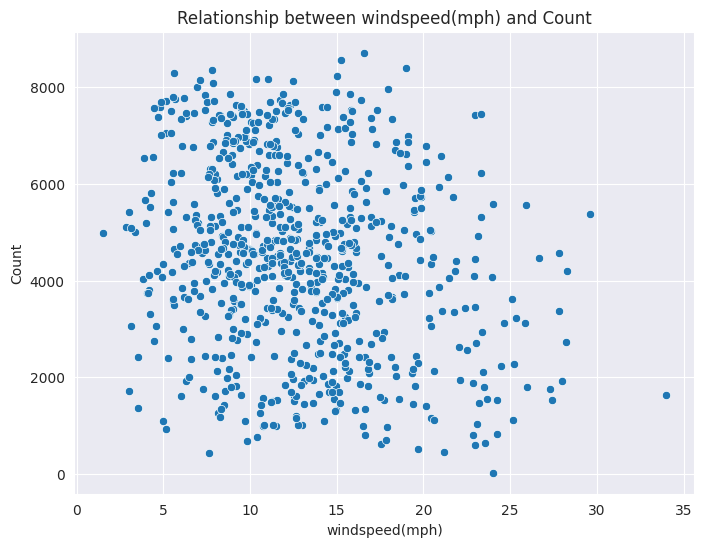

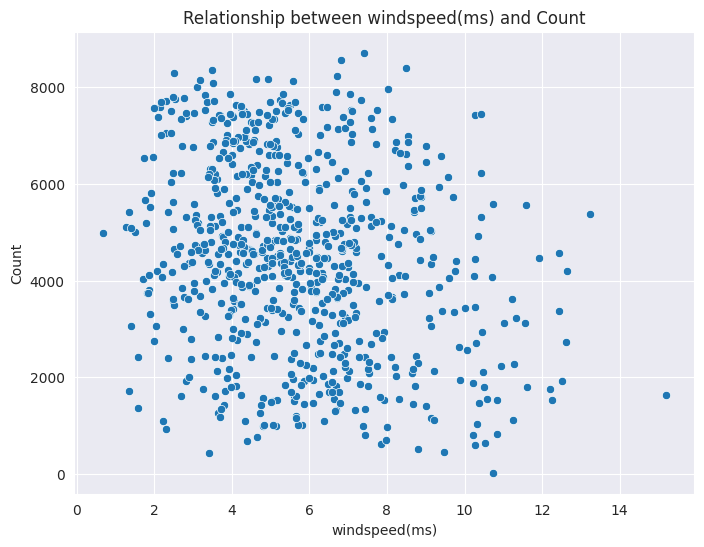

In [32]:
import seaborn as sns

attributes = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
              'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

for attribute in attributes:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=attribute, y='cnt')
    plt.title(f'Relationship between {attribute} and Count')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.show()

In [ ]:
__Вопросы:__
1. Каков характер зависимости числа прокатов от месяца?
Из графика зависимости числа прокатов от месяца видно, что зависимость имеет некоторый сезонный характер. В летние месяцы (с примерно мая по август) количество прокатов велосипедов достаточно высокое, что можно объяснить более благоприятными погодными условиями и активной отпускной сезонной деятельностью. Весной и осенью (март, апрель и сентябрь, октябрь) наблюдается более умеренное количество прокатов. Зимой (ноябрь, декабрь, январь, февраль) спрос на прокат велосипедов снижается, возможно, из-за менее комфортных погодных условий.
2. Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
Из графиков можно предположить, что признаки temp (температура в Цельсиях) и atemp (температура по ощущениям в Цельсиях) могут оказывать линейное воздействие на количество прокатов. Когда температура выше, скорее всего, больше людей предпочтут велосипеды для передвижения, что может привести к линейному увеличению количества прокатов велосипедов.


In [29]:
# Завдання 2
correlations = df.iloc[:, :-1].corrwith(df['cnt'])
numerical_features = df.iloc[:, :-1].select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
print("Correlations with 'cnt':")
print(correlations)
print("Correlation Matrix between numerical features:")
print(correlation_matrix)

Correlations with 'cnt':
season            0.406
yr                0.567
mnth              0.280
holiday          -0.068
weekday           0.067
workingday        0.061
weathersit       -0.297
temp              0.627
atemp             0.631
hum              -0.101
windspeed(mph)   -0.235
windspeed(ms)    -0.235
dtype: float64
Correlation Matrix between numerical features:
                season     yr   mnth  holiday  weekday  workingday  \
season           1.000 -0.002  0.831   -0.011   -0.003       0.012   
yr              -0.002  1.000 -0.002    0.008   -0.005      -0.002   
mnth             0.831 -0.002  1.000    0.019    0.010      -0.006   
holiday         -0.011  0.008  0.019    1.000   -0.102      -0.253   
weekday         -0.003 -0.005  0.010   -0.102    1.000       0.036   
workingday       0.012 -0.002 -0.006   -0.253    0.036       1.000   
weathersit       0.019 -0.049  0.044   -0.035    0.031       0.061   
temp             0.334  0.048  0.220   -0.029   -0.000       0.05

In [31]:
# Завдання 3
selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
selected_df = df[selected_features]

correlation_matrix = selected_df.corr().to_string(index=False)

print("Pairwise Correlations between selected features:")
print(correlation_matrix)

Pairwise Correlations between selected features:
  temp  atemp    hum  windspeed(mph)  windspeed(ms)    cnt
 1.000  0.992  0.127          -0.158         -0.158  0.627
 0.992  1.000  0.140          -0.184         -0.184  0.631
 0.127  0.140  1.000          -0.248         -0.248 -0.101
-0.158 -0.184 -0.248           1.000          1.000 -0.235
-0.158 -0.184 -0.248           1.000          1.000 -0.235
 0.627  0.631 -0.101          -0.235         -0.235  1.000


In [99]:
# Завдання 4
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('bikes_rent.csv')

mean_values = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
              'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']].mean()

scaler = StandardScaler()

print("Average values of features:")
print(mean_values)

Average values of features:
season              2.497
yr                  0.501
mnth                6.520
holiday             0.029
weekday             2.997
workingday          0.684
weathersit          1.395
temp               20.311
atemp              23.718
hum                62.789
windspeed(mph)     12.763
windspeed(ms)       5.705
cnt              4504.349
dtype: float64


In [109]:
# Завдання 5
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled['cnt']

model = LinearRegression()
model.fit(X, y)
print('Название признака, вес:')
for i in zip(df_shuffled.columns[:-1], model.coef_.round(3)):
    print (i)

Название признака, вес:
('season', 570.864)
('yr', 1021.965)
('mnth', -141.302)
('holiday', -86.759)
('weekday', 137.225)
('workingday', 56.392)
('weathersit', -330.226)
('temp', 367.484)
('atemp', 585.549)
('hum', -145.614)
('windspeed(mph)', 12457138390688.885)
('windspeed(ms)', -12457138390887.346)


In [111]:
# Завдання 6
from sklearn.linear_model import Lasso
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled['cnt']
model_ls = Lasso()
model_ls.fit(X, y)
print('Название признака, вес:')
for i in zip(df_shuffled.columns[:-1], model_ls.coef_.round(3)):
    print (i)


Название признака, вес:
('season', 560.242)
('yr', 1019.463)
('mnth', -128.731)
('holiday', -86.153)
('weekday', 137.348)
('workingday', 55.212)
('weathersit', -332.37)
('temp', 376.363)
('atemp', 576.531)
('hum', -144.129)
('windspeed(mph)', -197.14)
('windspeed(ms)', -0.0)


In [112]:
from sklearn.linear_model import Ridge

selected_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
df_shuffled = shuffle(df, random_state=42)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled['cnt']

ridge_regressor = Ridge()

ridge_regressor.fit(X, y)

ridge_feature_weights = list(zip(selected_features, ridge_regressor.coef_))
for feature, weight in ridge_feature_weights:
    print(f"{feature}: {weight:.10f}")


season: 563.0645722520
yr: 1018.9483787875
mnth: -131.8733202825
holiday: -86.7460979971
weekday: 138.0051111787
workingday: 55.9031103751
weathersit: -332.3497884991
temp: 386.4578891919
atemp: 566.3470470601
hum: -145.0713272987
windspeed(mph): -99.2594410818
windspeed(ms): -99.2594411543


Lasso Coefficients:
[[ 52.01350921 102.305733   -31.47974302 -67.5693483   -0.        ]
 [ 45.77320765 107.39879896 -31.02298246 -65.35781602  -0.        ]
 [ 39.53290608 112.49186492 -30.56622189 -63.14628374  -0.        ]
 [ 33.29260451 117.58493088 -30.10946132 -60.93475146  -0.        ]
 [ 27.05230295 122.67799684 -29.65270076 -58.72321919  -0.        ]
 [ 20.81200138 127.7710628  -29.19594019 -56.51168691  -0.        ]
 [ 14.57169981 132.86412876 -28.73917962 -54.30015463  -0.        ]
 [  8.33139825 137.95719472 -28.28241906 -52.08862235  -0.        ]
 [  2.09109668 143.05026068 -27.82565849 -49.87709007  -0.        ]
 [  0.         144.33325269 -27.35406874 -47.80619785  -0.        ]]
Ridge Coefficients:
[[ 51.57037948 102.7234931  -31.49025844 -56.33412979 -25.1828922 ]
 [ 54.3062876  100.11641179 -31.44992222 -56.29762563 -25.16657382]
 [ 56.43155658  98.07443903 -31.41206964 -56.24322114 -25.14225353]
 [ 58.12799458  96.42933237 -31.37598508 -56.17640452 -25.11238468]
 [ 59.5

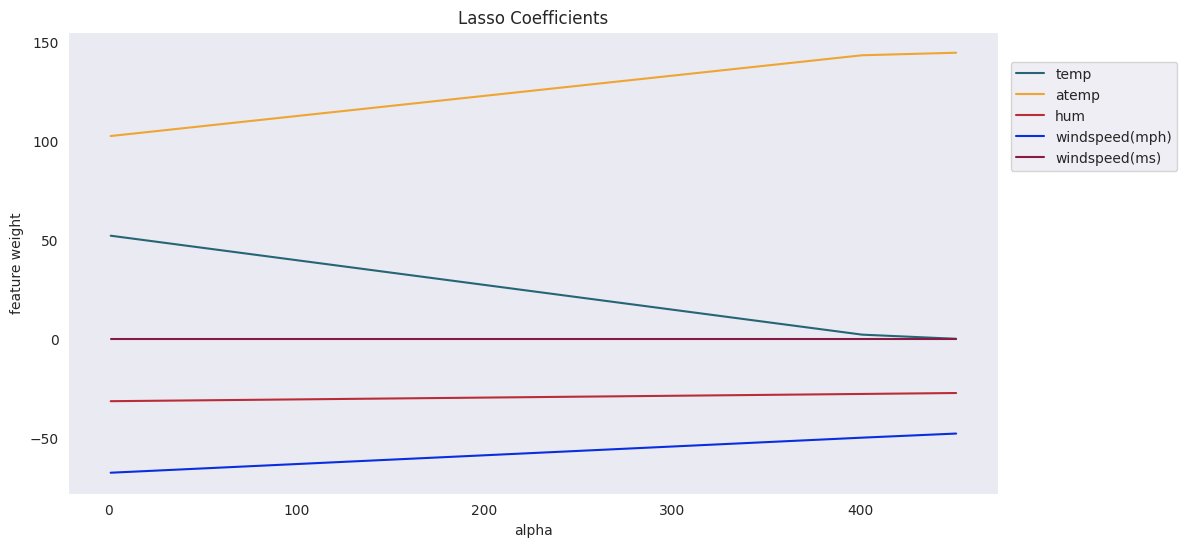

In [10]:
# Завдання 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']
X = df[selected_features]
y = df['cnt']

alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)
    
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)

print("Lasso Coefficients:")
print(coefs_lasso)

print("Ridge Coefficients:")
print(coefs_ridge)

plt.figure(figsize=(12, 6))

for coef, feature in zip(coefs_lasso.T, selected_features):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso Coefficients")
plt.grid()
plt.show()


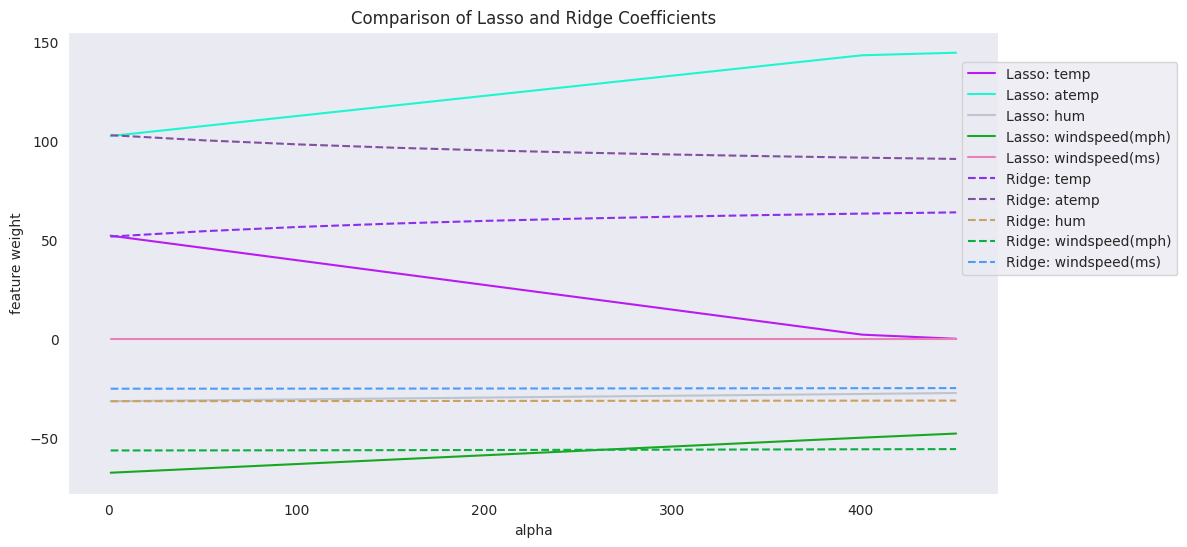

In [15]:
# Побудова порывняння графіків
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

X = df[selected_features]
y = df['cnt']

alphas = np.arange(1, 500, 50)

coefs_lasso = []
coefs_ridge = []

for alpha in alphas:
    lasso_regressor = Lasso(alpha=alpha)
    lasso_regressor.fit(X, y)
    coefs_lasso.append(lasso_regressor.coef_)
    
    ridge_regressor = Ridge(alpha=alpha)
    ridge_regressor.fit(X, y)
    coefs_ridge.append(ridge_regressor.coef_)

coefs_lasso = np.array(coefs_lasso)
coefs_ridge = np.array(coefs_ridge)


plt.figure(figsize=(12, 6))


for coef, feature in zip(coefs_lasso.T, selected_features):
    plt.plot(alphas, coef, label='Lasso: ' + feature, color=np.random.rand(3))


for coef, feature in zip(coefs_ridge.T, selected_features):
    plt.plot(alphas, coef, label='Ridge: ' + feature, linestyle='dashed', color=np.random.rand(3))

plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Comparison of Lasso and Ridge Coefficients")
plt.grid()
plt.show()



In [16]:
# Відповіді на питання 7 завдання
#     1. Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
#     Из графиков видно, что Lasso более агрессивно уменьшает веса признаков по сравнению с Ridge при одинаковом значении alpha. В Lasso многие веса быстро стремятся к нулю, что позволяет выбирать наиболее важные признаки.
# 
#     2. Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
#     Если alpha становится очень большим, то в Lasso регрессии все веса признаков будут стремиться к нулю. Это происходит потому, что L1-регуляризация в Lasso штрафует модель за большие значения весов, и при очень большом alpha модель будет стремиться минимизировать сумму модулей весов признаков вместо квадратов, что приводит к занулению большинства весов.
# 
#     3. Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? А Ridge? Считается, что регуляризатор исключает признак, если коэффициент при нем меньше $10^{-3}$.
#     Да, можно утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0. Это видно на графике, где веса признаков windspeed(mph) и windspeed(ms) стремятся к нулю при увеличении alpha. Ridge, в свою очередь, не исключает признаки полностью, даже если их коэффициенты становятся меньше $10^{-3}$.
# 
#     4. Какой из регуляризаторов подойдет для отбора неинформативных признаков?
#     Lasso подходит для отбора неинформативных признаков, так как он способен занулять веса признаков, что позволяет исключать неинформативные признаки из модели.

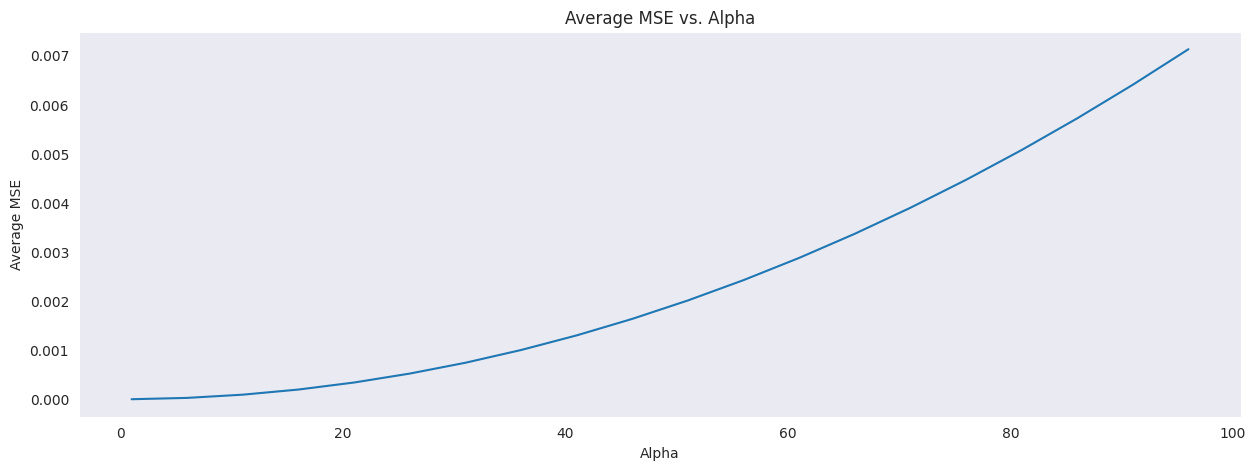

Chosen alpha: 1
temp: 0.0000000000
atemp: 0.0000000000
hum: -0.0000000000
windspeed(mph): -0.0000000000
windspeed(ms): -0.0000000000
cnt: 0.9999997332


In [17]:
# Завдання 8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV

df = pd.read_csv('bikes_rent.csv')

selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)', 'cnt']
X = df[selected_features]
y = df['cnt']

alphas = np.arange(1, 100, 5)

lasso_regressor_cv = LassoCV(alphas=alphas, cv=3)
lasso_regressor_cv.fit(X, y)

def create_plot(data, title, xlabel, ylabel, figsize=None):
    size = figsize or (15, 5)
    plt.figure(figsize=size)

    x = list(map(lambda e: e[0], data))
    y = list(map(lambda e: np.mean(e[1]), data))
    plt.plot(x, y)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.grid()
    plt.show()

create_plot(list(zip(lasso_regressor_cv.alphas_, lasso_regressor_cv.mse_path_)),
            "Average MSE vs. Alpha", "Alpha", "Average MSE")

print("Chosen alpha:", lasso_regressor_cv.alpha_)

coefficients = list(zip(selected_features, lasso_regressor_cv.coef_))
for feature, coefficient in coefficients:
    print(f"{feature}: {coefficient:.10f}")

Alphas with minimum MSE:
Alpha = 451.00, MSE = 3696734.574590
Alpha = 401.00, MSE = 3690954.439501
Alpha = 351.00, MSE = 3685675.532004
Alpha = 301.00, MSE = 3680735.480911
Alpha = 251.00, MSE = 3676164.570505
Alpha = 201.00, MSE = 3671962.534435
Alpha = 151.00, MSE = 3668129.450265
Alpha = 101.00, MSE = 3664665.308418
Alpha = 51.00, MSE = 3661570.089064
Alpha = 1.00, MSE = 3738168.082779


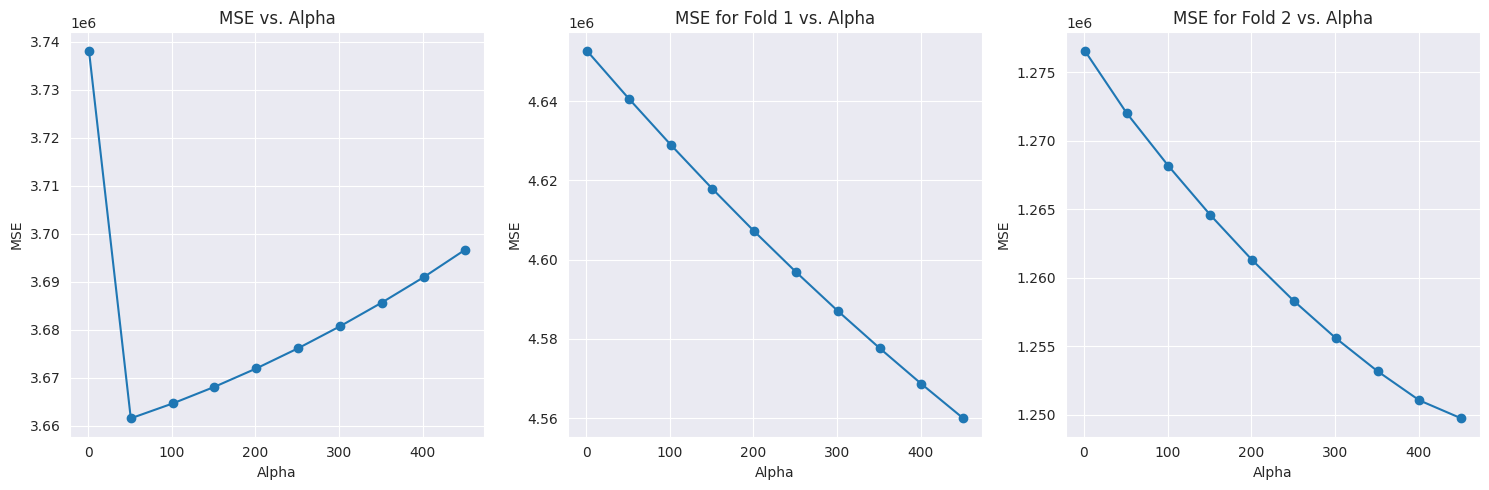

In [114]:
# Завдання 9
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

X = df[selected_features]
y = df['cnt']

alphas = np.arange(1, 500, 50)

lasso_cv = LassoCV(alphas=alphas, cv=3, max_iter=10000)

lasso_cv.fit(X, y)

optimal_alphas = lasso_cv.alphas_
optimal_mse = lasso_cv.mse_path_.mean(axis=1)

print("Alphas with minimum MSE:")
for alpha, mse in zip(optimal_alphas, optimal_mse):
    print(f"Alpha = {alpha:.2f}, MSE = {mse:.6f}")
    
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(optimal_alphas, optimal_mse, marker='o')
axes[0].set_title('MSE vs. Alpha')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('MSE')

axes[1].plot(optimal_alphas, lasso_cv.mse_path_[:, 0], marker='o')
axes[1].set_title('MSE for Fold 1 vs. Alpha')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('MSE')

axes[2].plot(optimal_alphas, lasso_cv.mse_path_[:, 1], marker='o')
axes[2].set_title('MSE for Fold 2 vs. Alpha')
axes[2].set_xlabel('Alpha')
axes[2].set_ylabel('MSE')

plt.tight_layout()
plt.show()


Optimal alphas for each fold: [451 401 351 301 251 201 151 101  51   1]


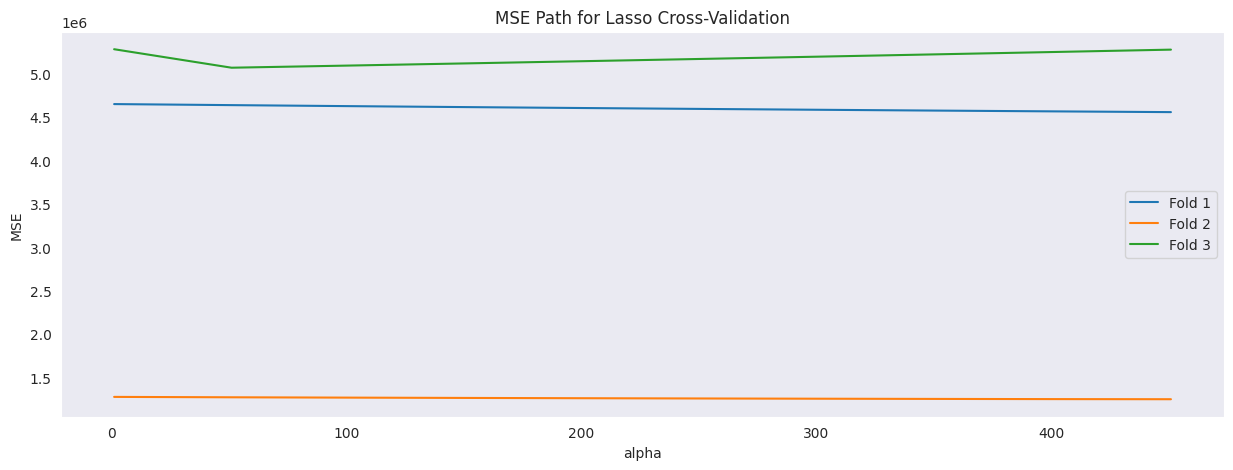

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

selected_features = ['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']

X = df[selected_features]
y = df['cnt']

alphas = np.arange(1, 500, 50)

lasso_cv = LassoCV(alphas=alphas, cv=3, max_iter=100000)

lasso_cv.fit(X, y)

print("Optimal alphas for each fold:", lasso_cv.alphas_)

plt.figure(figsize=(15, 5))

for i, fold_mse in enumerate(lasso_cv.mse_path_.T):
    plt.plot(lasso_cv.alphas_, fold_mse, label=f"Fold {i+1}")

plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("MSE Path for Lasso Cross-Validation")
plt.legend()
plt.grid()
plt.show()


In [21]:
# Задание 10

# Вопрос 1

lasso_coefs = lasso_cv.coef_

feature_coefs = list(zip(selected_features, lasso_coefs))

feature_coefs_sorted = sorted(feature_coefs, key=lambda x: x[1], reverse=True)

top_positive_features = [feature for feature, coef in feature_coefs_sorted if coef > 0][:4]
print("Top 4 features with largest positive coefficients:")
print(top_positive_features)



Top 4 features with largest positive coefficients:
['atemp', 'temp']


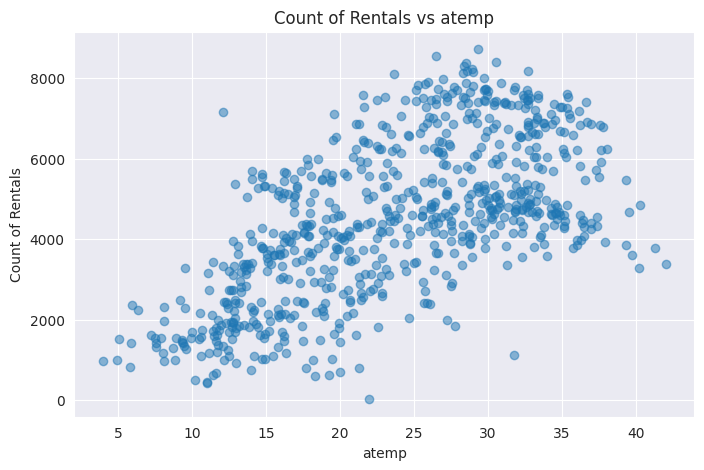

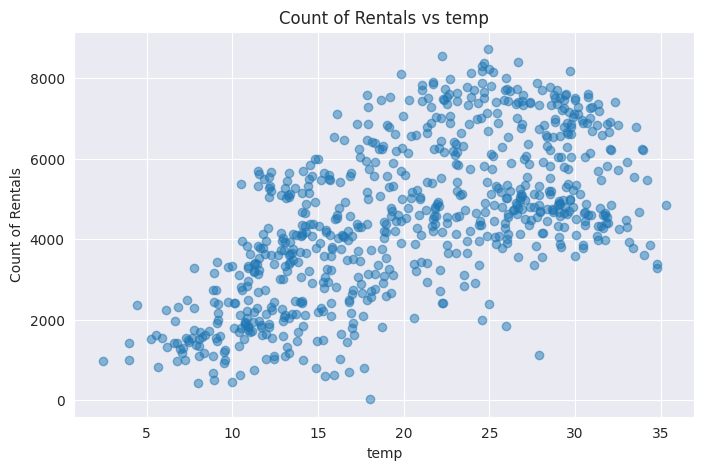

In [27]:
import matplotlib.pyplot as plt

# Построение графиков зависимости cnt от выбранных признаков
for feature in top_positive_features[:4]:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[feature], df['cnt'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Count of Rentals')
    plt.title(f'Count of Rentals vs {feature}')
    plt.show()


In [30]:
# Вопрос 2

top_negative_features = [feature for feature, coef in feature_coefs_sorted if coef < 0][:3]
print("Top 3 features with largest absolute negative coefficients:")
print(top_negative_features)


Top 3 features with largest absolute negative coefficients:
['hum', 'windspeed(mph)']


In [31]:
# Вопрос 3

near_zero_features = [feature for feature, coef in feature_coefs_sorted if abs(coef) < 1e-3]

print("Features with coefficients near zero:")
print(near_zero_features)


Features with coefficients near zero:
['windspeed(ms)']
